# Monty Hall Problem

_____

The Monty Hall problem is named for its similarity to the Let's Make a Deal television game show hosted by Monty Hall. The problem is stated as follows. Assume that a room is equipped with three doors. Behind two are goats, and behind the third is a shiny new car. You are asked to pick a door, and will win whatever is behind it. Let's say you pick door 1. Before the door is opened, however, someone who knows what's behind the doors (Monty Hall) opens one of the other two doors, revealing a goat, and asks you if you wish to change your selection to the third door (i.e., the door which neither you picked nor he opened). The Monty Hall problem is deciding whether you do.

The correct answer is that you do want to switch. If you do not switch, you have the expected 1/3 chance of winning the car, since no matter whether you initially picked the correct door, Monty will show you a door with a goat. But after Monty has eliminated one of the doors for you, you obviously do not improve your chances of winning to better than 1/3 by sticking with your original choice. If you now switch doors, however, there is a 2/3 chance you will win the car (counterintuitive though it seems).


Now let us check the chance using python code.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Goats = np.array(['Goat: 1', 'Goat: 2'])
Goats

array(['Goat: 1', 'Goat: 2'], dtype='<U7')

In [3]:
def get_other_goat(Goat):
    
    if Goat == 'Goat: 1':
        return 'Goat: 2'
    elif Goat == 'Goat: 2':
        return 'Goat: 1'

In [4]:
shift_1 = get_other_goat('Goat: 1')
shift_2 = get_other_goat('Goat: 2')
print('If door corresponds to Goat: 1 is selected then open - ',shift_1 )
print('If door corresponds to Goat: 2 is selected then open - ',shift_2 )

If door corresponds to Goat: 1 is selected then open -  Goat: 2
If door corresponds to Goat: 2 is selected then open -  Goat: 1


In [5]:
Hidden_behind_doors = np.array(['Car', 'Goat: 1', 'Goat: 2'])
Hidden_behind_doors

array(['Car', 'Goat: 1', 'Goat: 2'], dtype='<U7')

In [6]:
def monty_hall_game():
    
    contestant_guess = np.random.choice(Hidden_behind_doors)
    
    if contestant_guess == 'Goat: 1':
        return [contestant_guess, 'Goat: 2', 'Car']
    
    if contestant_guess == 'Goat: 2':
        return [contestant_guess, 'Goat: 1', 'Car']
    
    if contestant_guess == 'Car':
        revealed = np.random.choice(Goats)
        return [contestant_guess, revealed, get_other_goat(revealed)]

In [7]:
monty_hall_game()

['Goat: 1', 'Goat: 2', 'Car']

In [8]:
play = []

for i in np.arange(10000):
    
    play.append(monty_hall_game())
    
Games = pd.DataFrame(play, columns = ['Guess', 'Revealed', 'Remaining'])
Games

,Guess,Revealed,Remaining
0,Goat: 2,Goat: 1,Car
1,Goat: 2,Goat: 1,Car
2,Car,Goat: 1,Goat: 2
3,Car,Goat: 2,Goat: 1
4,Goat: 2,Goat: 1,Car
...,...,...,...
9995,Car,Goat: 2,Goat: 1
9996,Goat: 1,Goat: 2,Car
9997,Goat: 1,Goat: 2,Car
9998,Car,Goat: 1,Goat: 2


In [9]:
Guess_count = Games.pivot_table(index = ['Guess'], aggfunc ='size')
Guess_count

Guess
Car        3382
Goat: 1    3283
Goat: 2    3335
dtype: int64

In [10]:
Remaining_count = pd.pivot_table(Games, index = ['Remaining'], aggfunc ='size')
Remaining_count

Remaining
Car        6618
Goat: 1    1670
Goat: 2    1712
dtype: int64

In [11]:
Data = pd.DataFrame([['Car', Guess_count[0],  Remaining_count[0]], ['Goat: 1', Guess_count[1], Remaining_count[1]], ['Goat: 2', Guess_count[2], Remaining_count[2]]], columns=['Item', 'Original Door', 'Remaining Door']) 
Data

,Item,Original Door,Remaining Door
0,Car,3382,6618
1,Goat: 1,3283,1670
2,Goat: 2,3335,1712


Text(0.5, 0, 'Count')

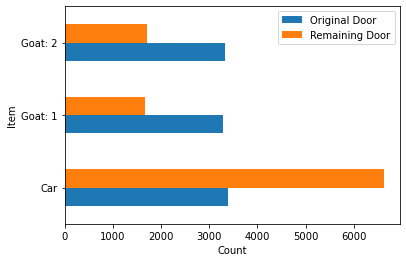

In [12]:
ax = Data.plot.barh(0)
ax.set_xlabel('Count') 

##### From above graph its clear that if we switch the door then the chance will increase.